In [4]:
import numpy as np
import par
import modes
import spectra
import matplotlib.pyplot as plt

precomputing bessel functions...

bessel functions precomputed.



# Comparison of $C_\ell$ for 3-fluid and 2-fluid


In [8]:
# numerical parameters.
NT = 16384
NK = 256
a0_pca = 0.00005
A = np.linspace(par.a0, par.a_rec, 2*NT)
K = np.linspace(0.01,1000,NK)

# First get Cl using 3-fluid

# 3-fluid parameters
H0 = 1.0
h = 0.05
OmegaB0 = 0.04968
OmegaC0 = 0.26754
OmegaG0 = 5.50234e-5
OmegaN0 = 3.74248e-5 

# 3 fluid GDM functions
wC = np.zeros(2*NT)
cs2C = np.zeros((2*NT,NK))
wN = np.ones(2*NT)*1/3
cs2N = np.ones((2*NT,NK))*1/3
params_F = [wC, cs2C, wN, cs2N, OmegaB0, OmegaC0, OmegaG0, OmegaN0, H0]

Cl_3f  = spectra.get_Cl_3fld(A, K, *params_F)

# Now get Cl using 2-fluid
# solve for perturbation history using 3-fluid model.
Y = modes.solve_3fld(A, K, wC, cs2C, wN, cs2N,
        OmegaB0, OmegaC0, OmegaG0, OmegaN0, H0)

Phi = Y[:, 0, :].T
deltaG = Y[:, 1, :].T
vG = Y[:, 2, :].T
deltaC =Y[:, 3, :].T
vC = Y[:, 4, :].T
deltaN = Y[:, 5, :].T
vN =Y[:, 6, :].T

OmegaB = OmegaB0 * A[::2]**-3
OmegaC = OmegaC0 * A[::2]**-3
OmegaN = OmegaN0 * A[::2]**-4
OmegaG = OmegaG0 * A[::2]**-4
OmegaD = OmegaN + OmegaC

# calculate GDM functions
wD = OmegaN/(3*OmegaD)
deltaD = (OmegaC*deltaC + OmegaN*deltaN)/OmegaD
vD = (OmegaC*vC + 4/3*OmegaN*vN)/((1+wD)*OmegaD)
cs2D = (deltaN*OmegaN/3)/(deltaD*OmegaD)
delta_pD = deltaN

Cl_2f = spectra.get_Cl_2fld(A[::2], K, wD, cs2D, deltaD[:,0], vD[:,0], 
                             OmegaB0, OmegaC0, OmegaG0, OmegaN0, H0)


err = spectra.get_Cl_err(Cl_3f)
Sigma = np.diag(err**2)



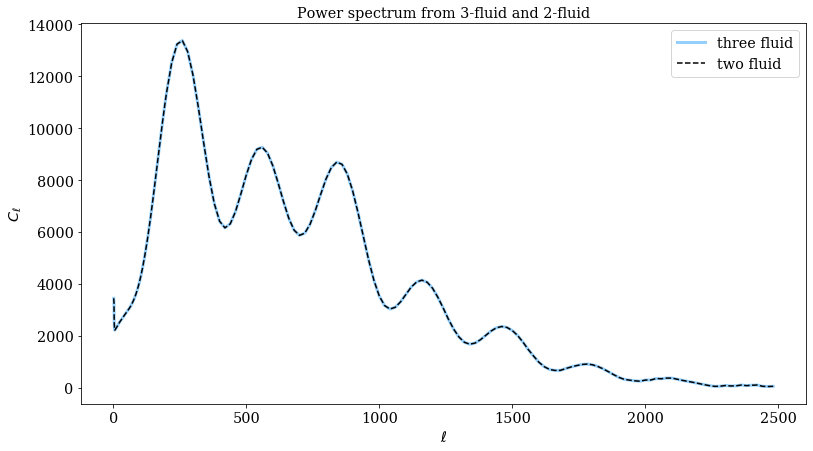

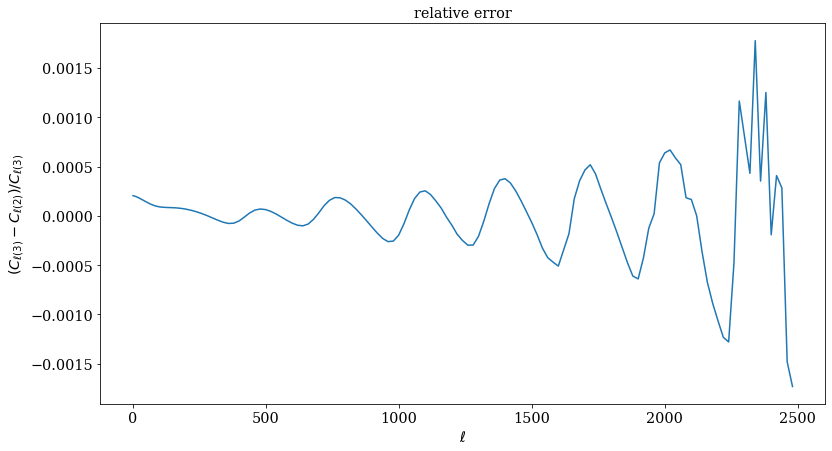

In [9]:
plt.rcParams.update(par.plot_params)
plt.title('Power spectrum from 3-fluid and 2-fluid')
plt.plot(spectra.l_list,Cl_3f,linewidth=3,color='xkcd:light blue')
plt.plot(spectra.l_list,Cl_2f,linestyle='--', color='black')
plt.legend(['three fluid', 'two fluid'])
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$')
plt.show()

plt.title('relative error')
plt.plot(spectra.l_list,(Cl_3f-Cl_2f)/Cl_3f)
plt.xlabel('$\ell$')
plt.ylabel('$(C_{\ell(3)}-C_{\ell(2)})/C_{\ell(3)}$')
plt.show()